In [1]:
pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from datetime import datetime
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns

# **Input Data Time Series**

In [3]:
from pandas.core.tools.datetimes import to_datetime
df_tem = pd.read_csv("/content/drive/MyDrive/3. Time Series Suhu/Suhu_Tem.csv", )
df_tem["Tanggal"] = to_datetime(df_tem["Tanggal"])
df_tem = df_tem.set_index("Tanggal", drop=True)
df_tem.head()

,T Avg,Rh Avg
Tanggal,,
2020-01-01,28.9,78.0
2020-01-02,28.5,82.0
2020-01-03,27.2,86.0
2020-01-04,27.6,82.0
2020-01-05,27.6,82.0


In [4]:
df_tem = df_tem["2021-05-31":"2022-05-29"]
df_tem

,T Avg,Rh Avg
Tanggal,,
2021-05-31,28.6,82.0
2021-06-01,28.9,80.0
2021-06-02,28.9,79.0
2021-06-03,28.8,77.0
2021-06-04,29.4,77.0
...,...,...
2022-05-25,29.5,77.0
2022-05-26,27.3,84.0
2022-05-27,27.4,84.0


# **Pola Suhu Per Stasiun**

**Plot Data Harian Stasiun Temindung**

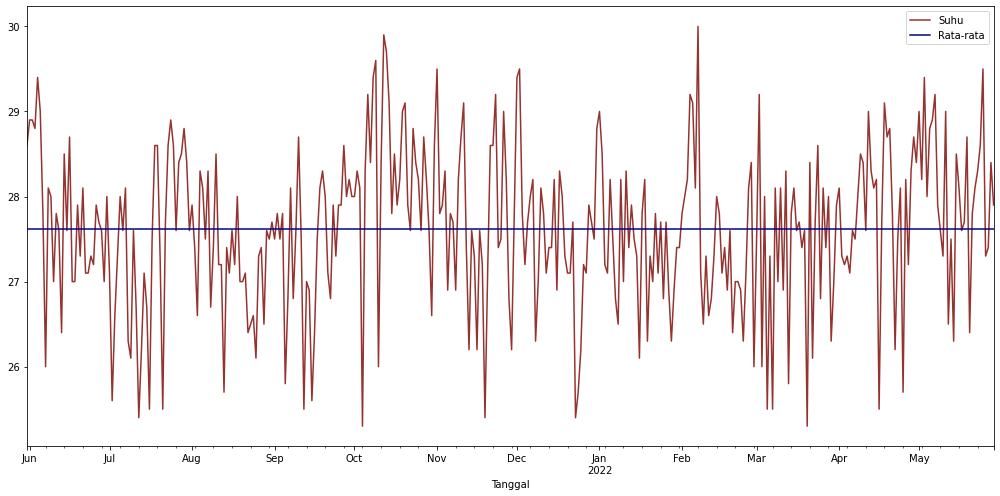

In [10]:
# Plot Data Harian Stasiun Temindung
df_tem['T Avg'].plot(figsize=(14,7), color = "#94332F")
plt.axhline(y=df_tem['T Avg'].mean(), color = 'darkblue')
plt.legend(("Suhu", "Rata-rata"))
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/3. Time Series Suhu/Plan_A_Plot_1.jpg")

In [6]:
[df_tem['T Avg'].min(), df_tem['T Avg'].max(), df_tem['T Avg'].mean()]

[25.3, 30.0, 27.61291208791209]

In [7]:
df_tem.loc[df_tem['T Avg'] == 25.3]

,T Avg,Rh Avg
Tanggal,,
2021-10-04,25.3,88.0
2022-03-20,25.3,92.0


In [8]:
df_tem.loc[df_tem['T Avg'] == 30.0]

,T Avg,Rh Avg
Tanggal,,
2022-02-07,30.0,69.0


In [9]:
27.61-26.6

1.009999999999998

Berdasarkan line plot, suhu pada Stasiun Temindung memiliki fluktuasi yang cukup tinggi. Selama periode penelitian, Stasiun Temindung memiliki suhu terendah pada 4 Oktober 2021 dan 20 Maret 2022 yaitu 25.3C, dan suhu tertinggi pada 7 Februari 2022 yaitu 30.0C. Rata-rata suhu pada periode penelitian yaitu 27.61C. Rata-rata suhu ini mengalami kenaikan sebesar 1C dari rata-rata suhu normal yaitu 26.6C.

**Plot ACF dan PACF Stasiun Temindung**

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


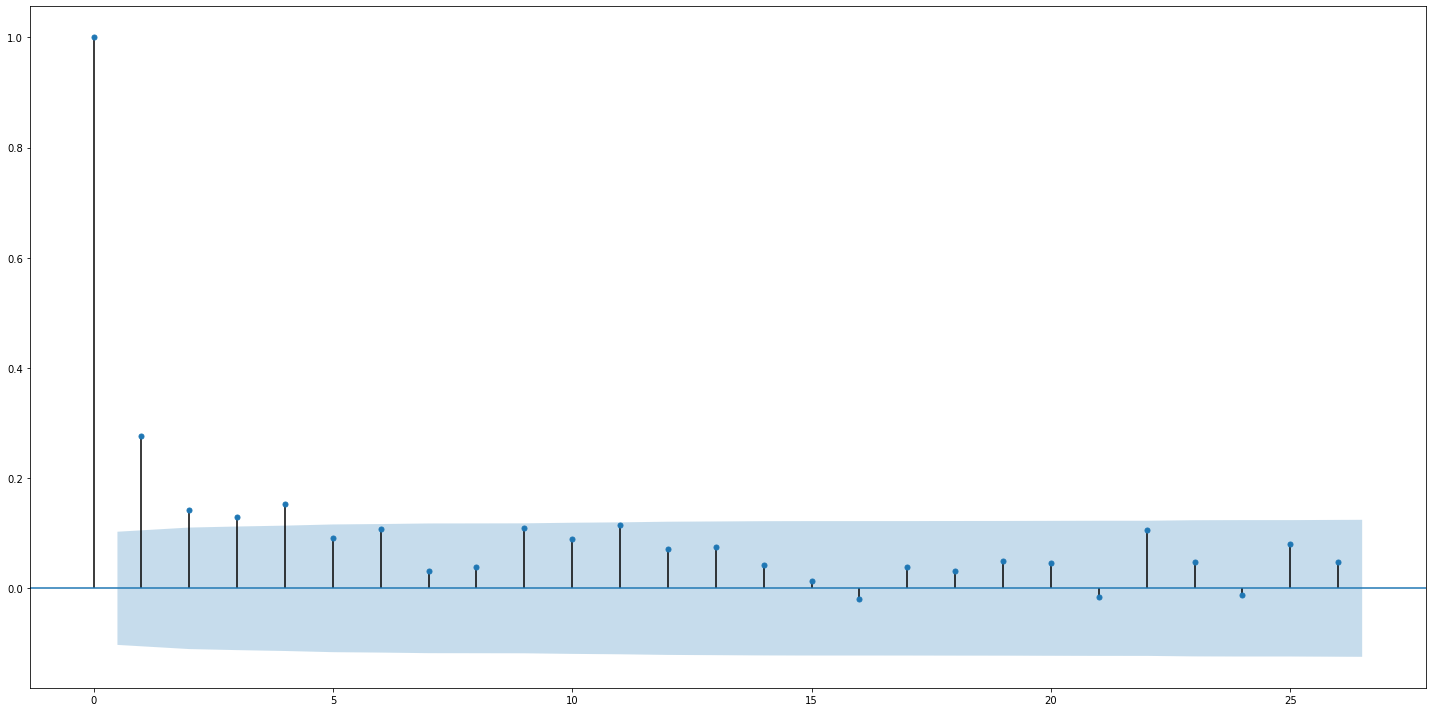

In [11]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig, ax = plt.subplots(figsize=(20, 10))
plot_acf(df_tem["T Avg"], ax = ax)
#plt.show()
plt.title('')
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/3. Time Series Suhu/Plan_A_Plot_2.jpg")

Nilai ACF menandakan pengaruh langsung dan tidak langsung dari data lampau (lag-k) terhadap data saat ini. Pengaruh tersebut dirumuskan sebagai korelasi (cov(y_t, y_t-k)) antara data dengan periode asli (yt) terhadap data dengan lag ke-k (y_t-k). Thomas (1997) menyatakan bahwa data yang stasioner memiliki cov(y_t, y_t-k) yang konstan yang berarti nilai korelasinya tidak menunjukkan pola kenaikan, penurunan, ataupun musiman seiring dengan bertambahnya lag (k). Dari plot ACF data suhu Stasiun Temindung terlihat bahwa nilai ACF cenderung menurun perlahan dan menunjukkan pola musiman seiring dengan naiknya lag sehingga data ini tidak stasioner.

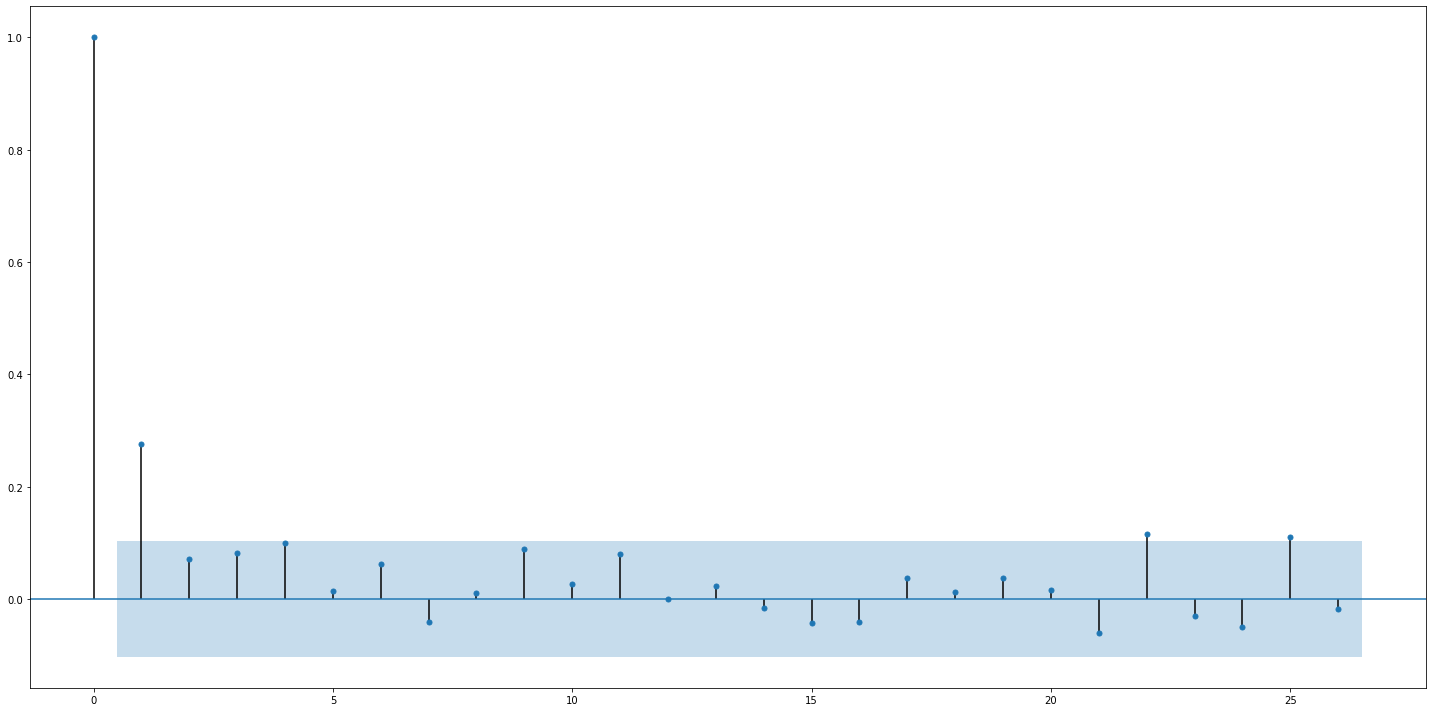

In [12]:
# Plot PACF
fig, ax = plt.subplots(figsize=(20, 10))
plot_pacf(df_tem["T Avg"], ax = ax)
#plt.show()
plt.title('')
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/3. Time Series Suhu/Plan_A_Plot_3.jpg")

Nilai PACF kurang lebih memiliki karakteristik yang sama dengan ACF namun nilai PACF hanya memperhitungkan pengaruh langsung dari data lampau terhadap data baru. Dari plot PACF data suhu Stasiun Temindung masih menunjukkan penurunan perlahan dan pola musiman seiring dengan naiknya lag sehingga data ini tidak stasioner.

**Uji *Augmented Dickey Fuller* (ADF) Stasiun Temindung**

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {:.2f}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [15]:
adf_test(df_tem['T Avg'])

ADF Statistics: -7.17
p- value: 2.8544498120982356e-10
Data has no unit root and is stationary


Uji ADF digunakan untuk menguji apakah suatu data deret waktu stasioner terhadap rataan. P-value yang dihasilkan dari Uji ADF lebih kecil daripada taraf nyata (α = 0.05) sehingga menunjukkan bahwa data suhu Stasiun Temindung **stasioner** terhadap rataan. 

**Uji Levene Stasiun Temindung**

Uji Levene digunakan untuk menguji apakah data deret waktu stasioner terhadap ragam. Stasioner terhadap ragam berarti ragam data deret waktu bersifat konstan untuk semua periode. Uji Levene untuk data deret waktu dilakukan dengan menguji perbedaan ragam antara beberapa kelompok periode. 

In [16]:
df_tem['Kelompok'] = 0
df_tem['Kelompok'][:"2021-11-29"] = 1
df_tem['Kelompok']["2021-11-29":] = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
df_tem

,T Avg,Rh Avg,Kelompok
Tanggal,,,
2021-05-31,28.6,82.0,1
2021-06-01,28.9,80.0,1
2021-06-02,28.9,79.0,1
2021-06-03,28.8,77.0,1
2021-06-04,29.4,77.0,1
...,...,...,...
2022-05-25,29.5,77.0,2
2022-05-26,27.3,84.0,2
2022-05-27,27.4,84.0,2


In [18]:
df_agg = (
    df_tem.groupby("Kelompok")
    .agg(
        avg_T=("T Avg", "mean"),
        var_T=("T Avg", "var"),
        avg_Rh=("Rh Avg", "mean"),
        var_Rh=("Rh Avg", "var")
    )
    .reset_index()
)

print(df_agg)

   Kelompok      avg_T     var_T     avg_Rh     var_Rh
0         1  27.637363  0.905668  83.186813  17.025682
1         2  27.588462  0.816275  82.703297  17.171149


In [19]:
group_1 = df_tem[df_tem['Kelompok']==1]['T Avg']
group_2 = df_tem[df_tem['Kelompok']==2]['T Avg']

In [20]:
from scipy.stats import levene
levene(group_1, group_2)

LeveneResult(statistic=0.419126790285708, pvalue=0.5177834150285898)

Uji Levene menghasilkan p-value yang lebih besar daripada taraf nyata (α = 0.05) sehingga menunjukkan bahwa ragam antara 2 kelompok tersebut homogen sehingga data suhu Stasiun Temindung stasioner terhadap ragam.


**Hubungan Suhu dan Kelembapan Stasiun**

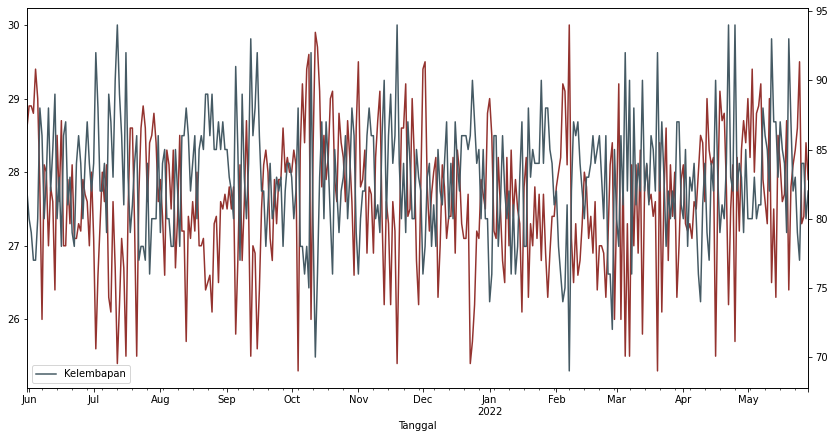

In [ ]:
df_tem['T Avg'].plot(color = "#94332F", figsize=(14,7))
ax2 = plt.twinx()
plt.legend(['Suhu'], loc = 'upper right')
df_tem['Rh Avg'].plot(color= '#455A64', ax=ax2)
plt.legend(['Kelembapan'], loc = 'lower left')

In [ ]:
# Meringkas data menjadi periode mingguan
df_tem_weekly = df_tem.resample(rule='W').mean()
df_tem_weekly.head()

,T Avg,Rh Avg,Kelompok
Tanggal,,,
2021-06-06,28.771429,80.428571,1.0
2021-06-13,27.271429,84.714286,1.0
2021-06-20,27.714286,82.571429,1.0
2021-06-27,27.485714,82.142857,1.0
2021-07-04,27.028571,85.571429,1.0


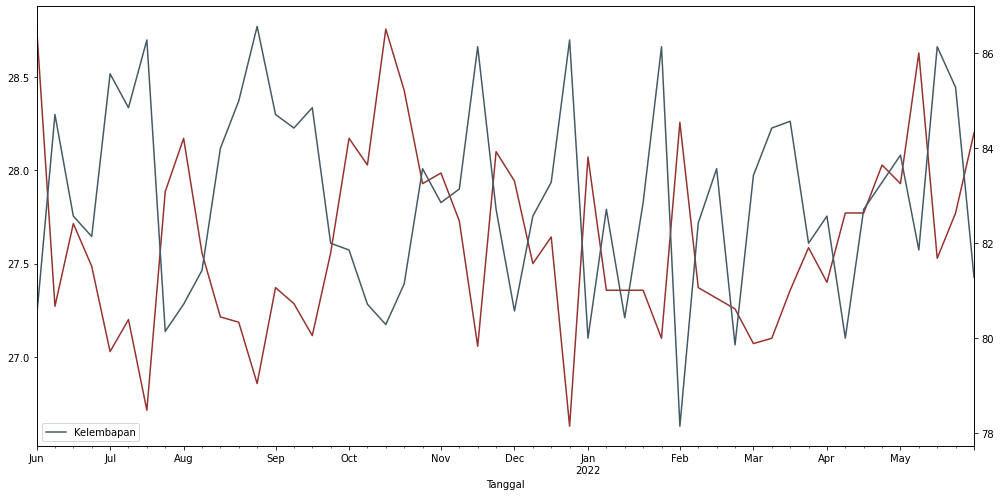

In [ ]:
df_tem_weekly['T Avg'].plot(color = "#94332F", figsize=(14,7))
ax2 = plt.twinx()
plt.legend(['Suhu'], loc = 'upper right')
df_tem_weekly['Rh Avg'].plot(color= '#455A64', ax=ax2)
plt.legend(['Kelembapan'], loc = 'lower left')

plt.title('')
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/3. Time Series Suhu/Plan_A_Plot_4.jpg")

Berdasarkan line plot antara suhu dan kelembapan terlihat bahwa kelembapan cenderung rendah saat suhu tinggi dan sebaliknya sehingga suhu dan kelembapan memiliki korelasi yang negatif.

In [21]:
import numpy as np
import statsmodels.api as sm

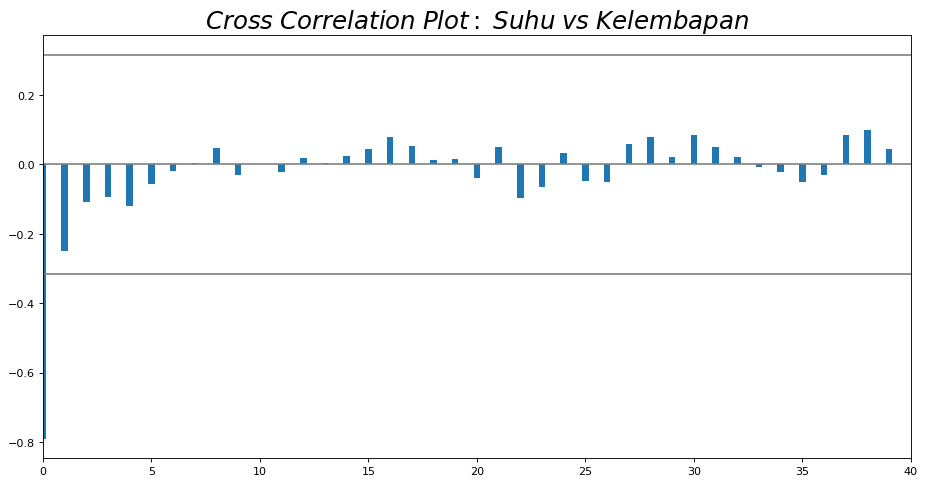

In [22]:
ccf = sm.tsa.stattools.ccf(df_tem['T Avg'], df_tem['Rh Avg'])[:40]
nlags = len(ccf)

conf_level = 2 / np.sqrt(nlags)

# Draw Plot
plt.figure(figsize=(14,7), dpi= 80)

plt.hlines(0, xmin=0, xmax=100, color='gray')  # 0 axis
plt.hlines(conf_level, xmin=0, xmax=100, color='gray')
plt.hlines(-conf_level, xmin=0, xmax=100, color='gray')

plt.bar(x=np.arange(len(ccf)), height=ccf, width=.3)

# Decoration
plt.title('$Cross\; Correlation\; Plot:\; Suhu\; vs\; Kelembapan$', fontsize=22)
plt.xlim(0,len(ccf))
plt.show()

Berdasarkan plot Cross Correlation, terlihat bahwa korelasi silang tertinggi terdapat pada data periode asli atau lag-0 yaitu sebesar -0.79. Hal ini menandakan bahwa suhu hanya dipengaruhi kelembapan pada hari tersebut saja dan  tidak terdapat pengaruh dari waktu sebelumnya.